## Data Processing

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [38]:
data = pd.read_csv('waiting_times.csv')
data.head()

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT
0,2018-01-01,2018-01-01 21:00:00.000,21,2018-01-01 21:15:00.000,Roller Coaster,0,2.0,0.0,0.000,0.00,0,0,0,2.0
1,2018-01-01,2018-01-01 19:30:00.000,19,2018-01-01 19:45:00.000,Bumper Cars,5,18.0,148.0,254.749,254.75,15,15,0,18.0
2,2018-01-01,2018-01-01 22:30:00.000,22,2018-01-01 22:45:00.000,Rapids Ride,0,1.0,0.0,0.000,0.00,0,0,0,2.0
3,2018-01-01,2018-01-01 12:45:00.000,12,2018-01-01 13:00:00.000,Crazy Dance,5,1.0,46.0,250.001,250.00,15,15,0,1.0
4,2018-01-01,2018-01-01 17:00:00.000,17,2018-01-01 17:15:00.000,Skyway,5,15.0,92.0,211.500,198.25,15,15,0,16.0


In [3]:
# check for missing values
data.isnull().sum()

WORK_DATE                   0
DEB_TIME                    0
DEB_TIME_HOUR               0
FIN_TIME                    0
ENTITY_DESCRIPTION_SHORT    0
WAIT_TIME_MAX               0
NB_UNITS                    0
GUEST_CARRIED               0
CAPACITY                    0
ADJUST_CAPACITY             0
OPEN_TIME                   0
UP_TIME                     0
DOWNTIME                    0
NB_MAX_UNIT                 0
dtype: int64

In [4]:
# check for data types
data.dtypes

WORK_DATE                    object
DEB_TIME                     object
DEB_TIME_HOUR                 int64
FIN_TIME                     object
ENTITY_DESCRIPTION_SHORT     object
WAIT_TIME_MAX                 int64
NB_UNITS                    float64
GUEST_CARRIED               float64
CAPACITY                    float64
ADJUST_CAPACITY             float64
OPEN_TIME                     int64
UP_TIME                       int64
DOWNTIME                      int64
NB_MAX_UNIT                 float64
dtype: object

In [5]:
# data normalization
for col in ['NB_UNITS', 'GUEST_CARRIED', 'CAPACITY', 'ADJUST_CAPACITY', 'OPEN_TIME', 'UP_TIME', 'DOWNTIME', 'NB_MAX_UNIT']:
    data[col] = (data[col] - data[col].min()) / (data[col].max() - data[col].min())

In [6]:
for col in ['WORK_DATE', 'DEB_TIME', 'FIN_TIME']:
    data[col] = pd.to_datetime(data[col])

data.dtypes

WORK_DATE                   datetime64[ns]
DEB_TIME                    datetime64[ns]
DEB_TIME_HOUR                        int64
FIN_TIME                    datetime64[ns]
ENTITY_DESCRIPTION_SHORT            object
WAIT_TIME_MAX                        int64
NB_UNITS                           float64
GUEST_CARRIED                      float64
CAPACITY                           float64
ADJUST_CAPACITY                    float64
OPEN_TIME                          float64
UP_TIME                            float64
DOWNTIME                           float64
NB_MAX_UNIT                        float64
dtype: object

In [7]:
data['WORK_DAY'] = data['WORK_DATE'].dt.day
data['WORK_MONTH'] = data['WORK_DATE'].dt.month
data['WORK_YEAR'] = data['WORK_DATE'].dt.year

In [8]:
data.head()

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT,WORK_DAY,WORK_MONTH,WORK_YEAR
0,2018-01-01,2018-01-01 21:00:00,21,2018-01-01 21:15:00,Roller Coaster,0,0.022901,0.030883,0.000000,0.000000,0.0,0.5,0.0,0.015385,1,1,2018
1,2018-01-01,2018-01-01 19:30:00,19,2018-01-01 19:45:00,Bumper Cars,5,0.145038,0.040445,0.336970,0.336971,1.0,1.0,0.0,0.138462,1,1,2018
2,2018-01-01,2018-01-01 22:30:00,22,2018-01-01 22:45:00,Rapids Ride,0,0.015267,0.030883,0.000000,0.000000,0.0,0.5,0.0,0.015385,1,1,2018
3,2018-01-01,2018-01-01 12:45:00,12,2018-01-01 13:00:00,Crazy Dance,5,0.015267,0.033855,0.330689,0.330688,1.0,1.0,0.0,0.007692,1,1,2018
4,2018-01-01,2018-01-01 17:00:00,17,2018-01-01 17:15:00,Skyway,5,0.122137,0.036826,0.279762,0.262235,1.0,1.0,0.0,0.123077,1,1,2018


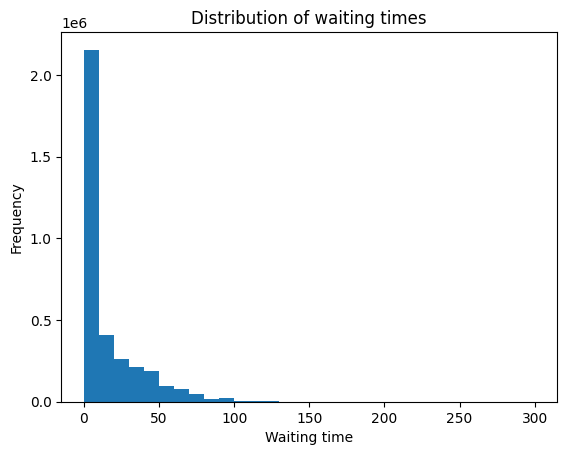

In [9]:
# plot the distribution of waiting times
import matplotlib.pyplot as plt

plt.hist(data['WAIT_TIME_MAX'], bins=30)
plt.xlabel('Waiting time')
plt.ylabel('Frequency')
plt.title('Distribution of waiting times')
plt.show()

右偏分布通常表示少数样本具有极端的高值，而大多数样本集中在较低的范围内。这种分布不利于一些线性模型的训练，可能会导致模型过度拟合较大值。可以通过以下方式处理：

对数据进行对数变换

对数变换可以压缩大数值的差距，使得数据分布更接近正态分布，从而改善模型的效果。在有 0 值的情况下，可以添加一个常数（如 1）来避免对数变换的负无穷问题。

In [10]:
import numpy as np
data['WAIT_TIME_MAX_log'] = np.log1p(data['WAIT_TIME_MAX'])

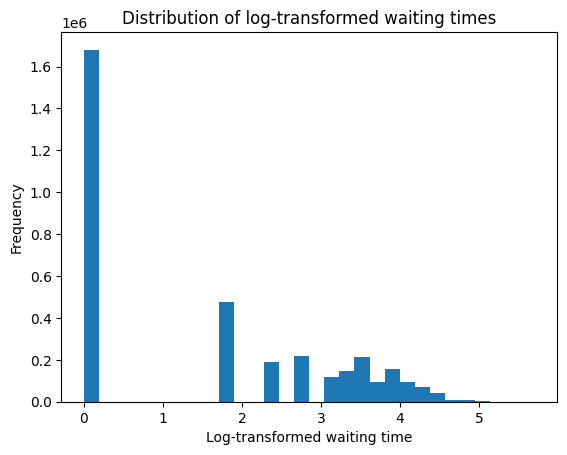

In [11]:
# plot the distribution of log-transformed waiting times
plt.hist(data['WAIT_TIME_MAX_log'], bins=30)
plt.xlabel('Log-transformed waiting time')
plt.ylabel('Frequency')
plt.title('Distribution of log-transformed waiting times')
plt.show()

模型预测的是 log_WAIT_TIME_MAX
log_predictions = model.predict(X_test)

使用 expm1 将对数变换逆转回去，得到原始的 WAIT_TIME_MAX 预测值
predictions = np.expm1(log_predictions)

<Axes: xlabel='WORK_DAY'>

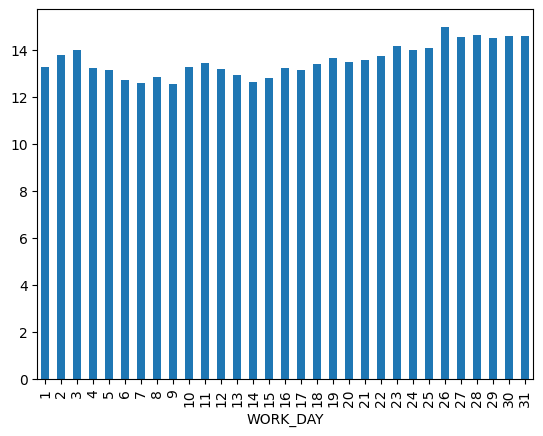

In [12]:
# plot histogram of waiting time by day
data.groupby('WORK_DAY')['WAIT_TIME_MAX'].mean().plot(kind='bar')

In [13]:
# Before creating time series features, we need to sort the data by date
data = data.sort_values(by=['ENTITY_DESCRIPTION_SHORT', 'DEB_TIME'])
data.head()

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT,WORK_DAY,WORK_MONTH,WORK_YEAR,WAIT_TIME_MAX_log
400,2018-01-01,2018-01-01 09:00:00,9,2018-01-01 09:15:00,Aeroplane Ride,5,0.160305,0.033208,0.15377,0.15377,1.0,1.0,0.0,0.153846,1,1,2018,1.791759
241,2018-01-01,2018-01-01 09:15:00,9,2018-01-01 09:30:00,Aeroplane Ride,5,0.160305,0.034759,0.15377,0.15377,1.0,1.0,0.0,0.153846,1,1,2018,1.791759
1301,2018-01-01,2018-01-01 09:30:00,9,2018-01-01 09:45:00,Aeroplane Ride,5,0.160305,0.036568,0.15377,0.15377,1.0,1.0,0.0,0.153846,1,1,2018,1.791759
1398,2018-01-01,2018-01-01 09:45:00,9,2018-01-01 10:00:00,Aeroplane Ride,5,0.160305,0.036568,0.15377,0.15377,1.0,1.0,0.0,0.153846,1,1,2018,1.791759
1453,2018-01-01,2018-01-01 10:00:00,10,2018-01-01 10:15:00,Aeroplane Ride,5,0.160305,0.036439,0.15377,0.15377,1.0,1.0,0.0,0.153846,1,1,2018,1.791759


In [14]:
# Time Series 1
# create two new columns called Lag1 and Lag2
# Lag1 is the waiting time of the same ENTITY_DESCRIPTION_SHORT on the previous event
# Lag2 is the waiting time of the same ENTITY_DESCRIPTION_SHORT two events ago

data['Lag1'] = data.groupby('ENTITY_DESCRIPTION_SHORT')['WAIT_TIME_MAX'].shift(1)
data['Lag2'] = data.groupby('ENTITY_DESCRIPTION_SHORT')['WAIT_TIME_MAX'].shift(2)

In [15]:
# how many distinct DEB_TIME for each ENTITY_DESCRIPTION_SHORT in a random day
data[data['WORK_DATE'] == '2019-01-07'].groupby('ENTITY_DESCRIPTION_SHORT')['DEB_TIME'].nunique()

ENTITY_DESCRIPTION_SHORT
Aeroplane Ride      56
Bumper Cars         56
Bungee Jump         56
Circus Train        56
Crazy Bus           56
Crazy Dance         56
Dizzy Dropper       56
Drop Tower          56
Flying Coaster      56
Free Fall           56
Giant Wheel         56
Giga Coaster        56
Go-Karts            56
Gondola             56
Haunted House       56
Himalaya Ride       56
Inverted Coaster    56
Kiddie Coaster      56
Log Flume           56
Merry Go Round      56
Monorail            56
Oz Theatre          56
Pirate Ship         56
Power Tower         56
Rapids Ride         56
Reverse Bungee      56
Roller Coaster      56
Scooby Doo          56
Skyway              56
Sling Shot          56
Spinning Coaster    56
Spiral Slide        56
Superman Ride       56
Swing Ride          56
Top Spin            56
Water Ride          56
Zipline             56
Name: DEB_TIME, dtype: int64

为什么是56？
开放时间为14小时，每小时进行4次，14 * 4 = 56

In [16]:
# Time Series 2
# create two new columns called RollingMean_Hour and RollingMean_Day, window size is 4 and 56 respectively

data['RollingMean_Hour'] = data.groupby('ENTITY_DESCRIPTION_SHORT')['WAIT_TIME_MAX'].rolling(window=4).mean().reset_index(0, drop=True)
data['RollingMean_Day'] = data.groupby('ENTITY_DESCRIPTION_SHORT')['WAIT_TIME_MAX'].rolling(window=56).mean().reset_index(0, drop=True)

# drop rows with missing values
data = data.dropna()

data.head()

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,...,DOWNTIME,NB_MAX_UNIT,WORK_DAY,WORK_MONTH,WORK_YEAR,WAIT_TIME_MAX_log,Lag1,Lag2,RollingMean_Hour,RollingMean_Day
1710,2018-01-01,2018-01-01 22:45:00,22,2018-01-01 23:00:00,Aeroplane Ride,0,0.160305,0.030883,0.00000,0.00000,...,0.0,0.153846,1,1,2018,0.000000,0.0,0.0,0.00,13.482143
2219,2018-01-02,2018-01-02 09:00:00,9,2018-01-02 09:15:00,Aeroplane Ride,15,0.160305,0.035987,0.15377,0.15377,...,0.0,0.153846,2,1,2018,2.772589,0.0,0.0,3.75,13.660714
3204,2018-01-02,2018-01-02 09:15:00,9,2018-01-02 09:30:00,Aeroplane Ride,15,0.160305,0.036439,0.15377,0.15377,...,0.0,0.153846,2,1,2018,2.772589,15.0,0.0,7.50,13.839286
3441,2018-01-02,2018-01-02 09:30:00,9,2018-01-02 09:45:00,Aeroplane Ride,15,0.160305,0.035857,0.15377,0.15377,...,0.0,0.153846,2,1,2018,2.772589,15.0,15.0,11.25,14.017857
3619,2018-01-02,2018-01-02 09:45:00,9,2018-01-02 10:00:00,Aeroplane Ride,15,0.160305,0.036374,0.15377,0.15377,...,0.0,0.153846,2,1,2018,2.772589,15.0,15.0,15.00,14.196429


In [17]:
# calculate a new colume called day of the week
data['WORK_WEEKDAY'] = data['WORK_DATE'].dt.weekday

# transform 0 to Mon, 1 to Tue, etc.
data['WORK_WEEKDAY'] = data['WORK_WEEKDAY'].apply(lambda x: ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'][x])

data.head()

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,...,NB_MAX_UNIT,WORK_DAY,WORK_MONTH,WORK_YEAR,WAIT_TIME_MAX_log,Lag1,Lag2,RollingMean_Hour,RollingMean_Day,WORK_WEEKDAY
1710,2018-01-01,2018-01-01 22:45:00,22,2018-01-01 23:00:00,Aeroplane Ride,0,0.160305,0.030883,0.00000,0.00000,...,0.153846,1,1,2018,0.000000,0.0,0.0,0.00,13.482143,Mon
2219,2018-01-02,2018-01-02 09:00:00,9,2018-01-02 09:15:00,Aeroplane Ride,15,0.160305,0.035987,0.15377,0.15377,...,0.153846,2,1,2018,2.772589,0.0,0.0,3.75,13.660714,Tue
3204,2018-01-02,2018-01-02 09:15:00,9,2018-01-02 09:30:00,Aeroplane Ride,15,0.160305,0.036439,0.15377,0.15377,...,0.153846,2,1,2018,2.772589,15.0,0.0,7.50,13.839286,Tue
3441,2018-01-02,2018-01-02 09:30:00,9,2018-01-02 09:45:00,Aeroplane Ride,15,0.160305,0.035857,0.15377,0.15377,...,0.153846,2,1,2018,2.772589,15.0,15.0,11.25,14.017857,Tue
3619,2018-01-02,2018-01-02 09:45:00,9,2018-01-02 10:00:00,Aeroplane Ride,15,0.160305,0.036374,0.15377,0.15377,...,0.153846,2,1,2018,2.772589,15.0,15.0,15.00,14.196429,Tue


<Axes: xlabel='WORK_WEEKDAY'>

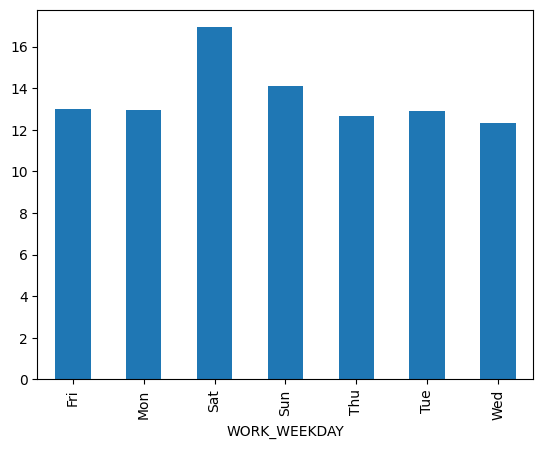

In [18]:
# plot histogram of waiting time by day of the week
data.groupby('WORK_WEEKDAY')['WAIT_TIME_MAX'].mean().plot(kind='bar')

In [19]:
# create a new column called 'Weekend', which is 1 if WORK_WEEKDAY == 'Sat' or 'Sun', and 0 otherwise
data['Weekend'] = data['WORK_WEEKDAY'].apply(lambda x: 1 if x in ['Sat', 'Sun'] else 0)
data.head()

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,...,WORK_DAY,WORK_MONTH,WORK_YEAR,WAIT_TIME_MAX_log,Lag1,Lag2,RollingMean_Hour,RollingMean_Day,WORK_WEEKDAY,Weekend
1710,2018-01-01,2018-01-01 22:45:00,22,2018-01-01 23:00:00,Aeroplane Ride,0,0.160305,0.030883,0.00000,0.00000,...,1,1,2018,0.000000,0.0,0.0,0.00,13.482143,Mon,0
2219,2018-01-02,2018-01-02 09:00:00,9,2018-01-02 09:15:00,Aeroplane Ride,15,0.160305,0.035987,0.15377,0.15377,...,2,1,2018,2.772589,0.0,0.0,3.75,13.660714,Tue,0
3204,2018-01-02,2018-01-02 09:15:00,9,2018-01-02 09:30:00,Aeroplane Ride,15,0.160305,0.036439,0.15377,0.15377,...,2,1,2018,2.772589,15.0,0.0,7.50,13.839286,Tue,0
3441,2018-01-02,2018-01-02 09:30:00,9,2018-01-02 09:45:00,Aeroplane Ride,15,0.160305,0.035857,0.15377,0.15377,...,2,1,2018,2.772589,15.0,15.0,11.25,14.017857,Tue,0
3619,2018-01-02,2018-01-02 09:45:00,9,2018-01-02 10:00:00,Aeroplane Ride,15,0.160305,0.036374,0.15377,0.15377,...,2,1,2018,2.772589,15.0,15.0,15.00,14.196429,Tue,0


<Axes: xlabel='WORK_MONTH'>

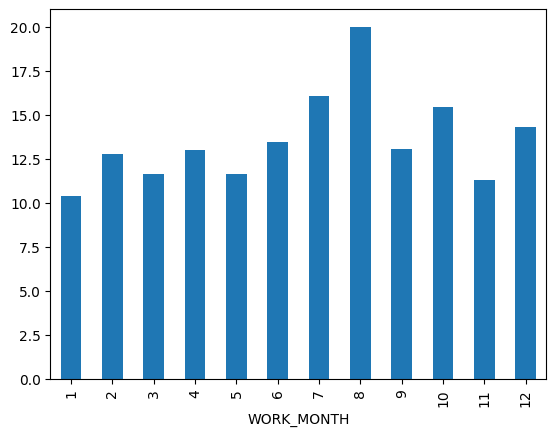

In [20]:
# plot histogram of waiting time by month
data.groupby('WORK_MONTH')['WAIT_TIME_MAX'].mean().plot(kind='bar')

In [21]:
# create a new column called 'Summer_Peak', which is 1 if WORK_MONTH is 7 or 8, and 0 otherwise
data['Summer_Peak'] = data['WORK_MONTH'].apply(lambda x: 1 if x in [7, 8] else 0)
data.head()

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,...,WORK_MONTH,WORK_YEAR,WAIT_TIME_MAX_log,Lag1,Lag2,RollingMean_Hour,RollingMean_Day,WORK_WEEKDAY,Weekend,Summer_Peak
1710,2018-01-01,2018-01-01 22:45:00,22,2018-01-01 23:00:00,Aeroplane Ride,0,0.160305,0.030883,0.00000,0.00000,...,1,2018,0.000000,0.0,0.0,0.00,13.482143,Mon,0,0
2219,2018-01-02,2018-01-02 09:00:00,9,2018-01-02 09:15:00,Aeroplane Ride,15,0.160305,0.035987,0.15377,0.15377,...,1,2018,2.772589,0.0,0.0,3.75,13.660714,Tue,0,0
3204,2018-01-02,2018-01-02 09:15:00,9,2018-01-02 09:30:00,Aeroplane Ride,15,0.160305,0.036439,0.15377,0.15377,...,1,2018,2.772589,15.0,0.0,7.50,13.839286,Tue,0,0
3441,2018-01-02,2018-01-02 09:30:00,9,2018-01-02 09:45:00,Aeroplane Ride,15,0.160305,0.035857,0.15377,0.15377,...,1,2018,2.772589,15.0,15.0,11.25,14.017857,Tue,0,0
3619,2018-01-02,2018-01-02 09:45:00,9,2018-01-02 10:00:00,Aeroplane Ride,15,0.160305,0.036374,0.15377,0.15377,...,1,2018,2.772589,15.0,15.0,15.00,14.196429,Tue,0,0


<Axes: xlabel='WORK_YEAR'>

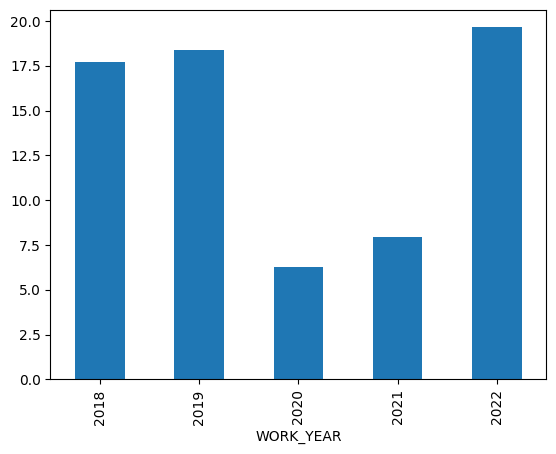

In [22]:
# plot histogram of waiting time by year
data.groupby('WORK_YEAR')['WAIT_TIME_MAX'].mean().plot(kind='bar')

In [23]:
# create a new column called 'Epidemic_Low', which is 1 if WORK_YEAR is 2020 or 2021, and 0 otherwise
data['Epidemic_Low'] = data['WORK_YEAR'].apply(lambda x: 1 if x in [2020, 2021] else 0)
data.head()

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,...,WORK_YEAR,WAIT_TIME_MAX_log,Lag1,Lag2,RollingMean_Hour,RollingMean_Day,WORK_WEEKDAY,Weekend,Summer_Peak,Epidemic_Low
1710,2018-01-01,2018-01-01 22:45:00,22,2018-01-01 23:00:00,Aeroplane Ride,0,0.160305,0.030883,0.00000,0.00000,...,2018,0.000000,0.0,0.0,0.00,13.482143,Mon,0,0,0
2219,2018-01-02,2018-01-02 09:00:00,9,2018-01-02 09:15:00,Aeroplane Ride,15,0.160305,0.035987,0.15377,0.15377,...,2018,2.772589,0.0,0.0,3.75,13.660714,Tue,0,0,0
3204,2018-01-02,2018-01-02 09:15:00,9,2018-01-02 09:30:00,Aeroplane Ride,15,0.160305,0.036439,0.15377,0.15377,...,2018,2.772589,15.0,0.0,7.50,13.839286,Tue,0,0,0
3441,2018-01-02,2018-01-02 09:30:00,9,2018-01-02 09:45:00,Aeroplane Ride,15,0.160305,0.035857,0.15377,0.15377,...,2018,2.772589,15.0,15.0,11.25,14.017857,Tue,0,0,0
3619,2018-01-02,2018-01-02 09:45:00,9,2018-01-02 10:00:00,Aeroplane Ride,15,0.160305,0.036374,0.15377,0.15377,...,2018,2.772589,15.0,15.0,15.00,14.196429,Tue,0,0,0


<Axes: xlabel='DEB_TIME_HOUR'>

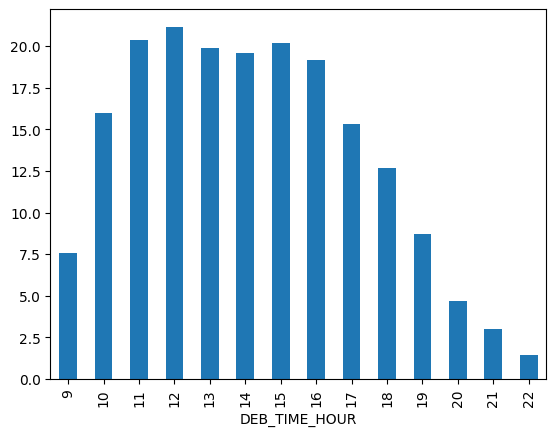

In [24]:
# plot histogram of waiting time by DEB_TIME_HOUR
data.groupby('DEB_TIME_HOUR')['WAIT_TIME_MAX'].mean().plot(kind='bar')

In [25]:
# create 4 new columns for the day. 9-10 is called 'Morning_Transition', 11-13 is called 'Noon_Peak', 14-16 is called 'Afternoon_Peak', 17-19 is called 'Evening_Transition', 20-22 is called 'Night_Low'
data['DEB_TIME_HOUR'] = data['DEB_TIME'].dt.hour
data['DEB_TIME_HOUR'] = data['DEB_TIME_HOUR'].astype(int)

data['TIME_OF_DAY'] = 'Night_Low'
data.loc[(data['DEB_TIME_HOUR'] >= 9) & (data['DEB_TIME_HOUR'] <= 10), 'TIME_OF_DAY'] = 'Morning_Transition'
data.loc[(data['DEB_TIME_HOUR'] >= 11) & (data['DEB_TIME_HOUR'] <= 13), 'TIME_OF_DAY'] = 'Noon_Peak'
data.loc[(data['DEB_TIME_HOUR'] >= 14) & (data['DEB_TIME_HOUR'] <= 16), 'TIME_OF_DAY'] = 'Afternoon_Peak'
data.loc[(data['DEB_TIME_HOUR'] >= 17) & (data['DEB_TIME_HOUR'] <= 19), 'TIME_OF_DAY'] = 'Evening_Transition'

data.head()

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,...,WAIT_TIME_MAX_log,Lag1,Lag2,RollingMean_Hour,RollingMean_Day,WORK_WEEKDAY,Weekend,Summer_Peak,Epidemic_Low,TIME_OF_DAY
1710,2018-01-01,2018-01-01 22:45:00,22,2018-01-01 23:00:00,Aeroplane Ride,0,0.160305,0.030883,0.00000,0.00000,...,0.000000,0.0,0.0,0.00,13.482143,Mon,0,0,0,Night_Low
2219,2018-01-02,2018-01-02 09:00:00,9,2018-01-02 09:15:00,Aeroplane Ride,15,0.160305,0.035987,0.15377,0.15377,...,2.772589,0.0,0.0,3.75,13.660714,Tue,0,0,0,Morning_Transition
3204,2018-01-02,2018-01-02 09:15:00,9,2018-01-02 09:30:00,Aeroplane Ride,15,0.160305,0.036439,0.15377,0.15377,...,2.772589,15.0,0.0,7.50,13.839286,Tue,0,0,0,Morning_Transition
3441,2018-01-02,2018-01-02 09:30:00,9,2018-01-02 09:45:00,Aeroplane Ride,15,0.160305,0.035857,0.15377,0.15377,...,2.772589,15.0,15.0,11.25,14.017857,Tue,0,0,0,Morning_Transition
3619,2018-01-02,2018-01-02 09:45:00,9,2018-01-02 10:00:00,Aeroplane Ride,15,0.160305,0.036374,0.15377,0.15377,...,2.772589,15.0,15.0,15.00,14.196429,Tue,0,0,0,Morning_Transition


In [26]:
# create a new column called 'Duration', which is the difference between FIN_TIME and DEB_TIME in minutes
data['Duration'] = (data['FIN_TIME'] - data['DEB_TIME']).dt.seconds / 60
data.head()

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,...,Lag1,Lag2,RollingMean_Hour,RollingMean_Day,WORK_WEEKDAY,Weekend,Summer_Peak,Epidemic_Low,TIME_OF_DAY,Duration
1710,2018-01-01,2018-01-01 22:45:00,22,2018-01-01 23:00:00,Aeroplane Ride,0,0.160305,0.030883,0.00000,0.00000,...,0.0,0.0,0.00,13.482143,Mon,0,0,0,Night_Low,15.0
2219,2018-01-02,2018-01-02 09:00:00,9,2018-01-02 09:15:00,Aeroplane Ride,15,0.160305,0.035987,0.15377,0.15377,...,0.0,0.0,3.75,13.660714,Tue,0,0,0,Morning_Transition,15.0
3204,2018-01-02,2018-01-02 09:15:00,9,2018-01-02 09:30:00,Aeroplane Ride,15,0.160305,0.036439,0.15377,0.15377,...,15.0,0.0,7.50,13.839286,Tue,0,0,0,Morning_Transition,15.0
3441,2018-01-02,2018-01-02 09:30:00,9,2018-01-02 09:45:00,Aeroplane Ride,15,0.160305,0.035857,0.15377,0.15377,...,15.0,15.0,11.25,14.017857,Tue,0,0,0,Morning_Transition,15.0
3619,2018-01-02,2018-01-02 09:45:00,9,2018-01-02 10:00:00,Aeroplane Ride,15,0.160305,0.036374,0.15377,0.15377,...,15.0,15.0,15.00,14.196429,Tue,0,0,0,Morning_Transition,15.0


In [27]:
# data type
data.dtypes

WORK_DATE                   datetime64[ns]
DEB_TIME                    datetime64[ns]
DEB_TIME_HOUR                        int32
FIN_TIME                    datetime64[ns]
ENTITY_DESCRIPTION_SHORT            object
WAIT_TIME_MAX                        int64
NB_UNITS                           float64
GUEST_CARRIED                      float64
CAPACITY                           float64
ADJUST_CAPACITY                    float64
OPEN_TIME                          float64
UP_TIME                            float64
DOWNTIME                           float64
NB_MAX_UNIT                        float64
WORK_DAY                             int32
WORK_MONTH                           int32
WORK_YEAR                            int32
WAIT_TIME_MAX_log                  float64
Lag1                               float64
Lag2                               float64
RollingMean_Hour                   float64
RollingMean_Day                    float64
WORK_WEEKDAY                        object
Weekend    

In [28]:
df = data[['ENTITY_DESCRIPTION_SHORT', 'WAIT_TIME_MAX', 'NB_UNITS', 'GUEST_CARRIED', 'CAPACITY', 'ADJUST_CAPACITY', 'OPEN_TIME', 'UP_TIME', 'DOWNTIME', 'NB_MAX_UNIT', 'WAIT_TIME_MAX_log', 'Lag1', 'Lag2', 'RollingMean_Hour', 'RollingMean_Day', 'Weekend', 'Summer_Peak', 'Epidemic_Low', 'TIME_OF_DAY', 'Duration']]
df.head()

,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT,WAIT_TIME_MAX_log,Lag1,Lag2,RollingMean_Hour,RollingMean_Day,Weekend,Summer_Peak,Epidemic_Low,TIME_OF_DAY,Duration
1710,Aeroplane Ride,0,0.160305,0.030883,0.00000,0.00000,0.0,0.5,0.0,0.153846,0.000000,0.0,0.0,0.00,13.482143,0,0,0,Night_Low,15.0
2219,Aeroplane Ride,15,0.160305,0.035987,0.15377,0.15377,1.0,1.0,0.0,0.153846,2.772589,0.0,0.0,3.75,13.660714,0,0,0,Morning_Transition,15.0
3204,Aeroplane Ride,15,0.160305,0.036439,0.15377,0.15377,1.0,1.0,0.0,0.153846,2.772589,15.0,0.0,7.50,13.839286,0,0,0,Morning_Transition,15.0
3441,Aeroplane Ride,15,0.160305,0.035857,0.15377,0.15377,1.0,1.0,0.0,0.153846,2.772589,15.0,15.0,11.25,14.017857,0,0,0,Morning_Transition,15.0
3619,Aeroplane Ride,15,0.160305,0.036374,0.15377,0.15377,1.0,1.0,0.0,0.153846,2.772589,15.0,15.0,15.00,14.196429,0,0,0,Morning_Transition,15.0


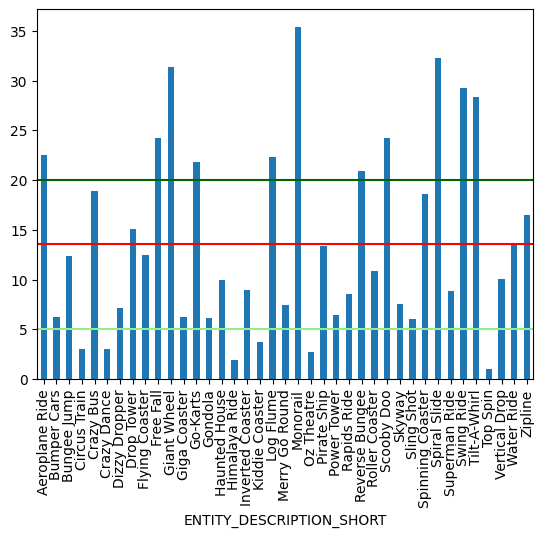

In [29]:
# plot histogram of waiting time by 'ENTITY_DESCRIPTION_SHORT'
df.groupby('ENTITY_DESCRIPTION_SHORT')['WAIT_TIME_MAX'].mean().plot(kind='bar')

# add a red line to show the average waiting time
plt.axhline(df['WAIT_TIME_MAX'].mean(), color='red')

# add a dark green line to show the Q3 waiting time
plt.axhline(df['WAIT_TIME_MAX'].quantile(0.75), color='darkgreen')

# add a light green line to show the Q1 waiting time
plt.axhline(df['WAIT_TIME_MAX'].quantile(0.5), color='lightgreen')
plt.show()

In [ ]:
# calculate the average waiting time for each ENTITY_DESCRIPTION_SHORT
avg_wait_time_per_entity = df.groupby('ENTITY_DESCRIPTION_SHORT')['WAIT_TIME_MAX'].mean()

# calculate the global median and Q3
global_q2 = df['WAIT_TIME_MAX'].quantile(0.5)
global_q3 = df['WAIT_TIME_MAX'].quantile(0.75)

# create a new column called 'ENTITY_TYPE'
# 'High' if the average waiting time of the ENTITY_DESCRIPTION_SHORT is greater than the global Q3
# 'Low' if it is less than the global Q2
# 'Medium' otherwise
df['ENTITY_TYPE'] = 'Medium'
df['ENTITY_TYPE'] = df['ENTITY_DESCRIPTION_SHORT'].map(
    lambda x: 'High' if avg_wait_time_per_entity[x] > global_q3 else 
              ('Low' if avg_wait_time_per_entity[x] < global_q2 else 'Medium')
)

df.head()

C:\Users\ROG\AppData\Local\Temp\ipykernel_25244\168141304.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ENTITY_TYPE'] = 'Medium'
C:\Users\ROG\AppData\Local\Temp\ipykernel_25244\168141304.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ENTITY_TYPE'] = df['ENTITY_DESCRIPTION_SHORT'].map(


,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT,...,Lag1,Lag2,RollingMean_Hour,RollingMean_Day,Weekend,Summer_Peak,Epidemic_Low,TIME_OF_DAY,Duration,ENTITY_TYPE
1710,Aeroplane Ride,0,0.160305,0.030883,0.00000,0.00000,0.0,0.5,0.0,0.153846,...,0.0,0.0,0.00,13.482143,0,0,0,Night_Low,15.0,High
2219,Aeroplane Ride,15,0.160305,0.035987,0.15377,0.15377,1.0,1.0,0.0,0.153846,...,0.0,0.0,3.75,13.660714,0,0,0,Morning_Transition,15.0,High
3204,Aeroplane Ride,15,0.160305,0.036439,0.15377,0.15377,1.0,1.0,0.0,0.153846,...,15.0,0.0,7.50,13.839286,0,0,0,Morning_Transition,15.0,High
3441,Aeroplane Ride,15,0.160305,0.035857,0.15377,0.15377,1.0,1.0,0.0,0.153846,...,15.0,15.0,11.25,14.017857,0,0,0,Morning_Transition,15.0,High
3619,Aeroplane Ride,15,0.160305,0.036374,0.15377,0.15377,1.0,1.0,0.0,0.153846,...,15.0,15.0,15.00,14.196429,0,0,0,Morning_Transition,15.0,High


In [31]:
df = df.drop(columns=['ENTITY_DESCRIPTION_SHORT'])
df.dtypes

WAIT_TIME_MAX          int64
NB_UNITS             float64
GUEST_CARRIED        float64
CAPACITY             float64
ADJUST_CAPACITY      float64
OPEN_TIME            float64
UP_TIME              float64
DOWNTIME             float64
NB_MAX_UNIT          float64
WAIT_TIME_MAX_log    float64
Lag1                 float64
Lag2                 float64
RollingMean_Hour     float64
RollingMean_Day      float64
Weekend                int64
Summer_Peak            int64
Epidemic_Low           int64
TIME_OF_DAY           object
Duration             float64
ENTITY_TYPE           object
dtype: object

In [32]:
# one hot encoding for 'TIME_OF_DAY' and 'ENTITY_TYPE'
df = pd.get_dummies(df, columns=['TIME_OF_DAY', 'ENTITY_TYPE'], dtype=int)
df.head()

,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT,WAIT_TIME_MAX_log,...,Epidemic_Low,Duration,TIME_OF_DAY_Afternoon_Peak,TIME_OF_DAY_Evening_Transition,TIME_OF_DAY_Morning_Transition,TIME_OF_DAY_Night_Low,TIME_OF_DAY_Noon_Peak,ENTITY_TYPE_High,ENTITY_TYPE_Low,ENTITY_TYPE_Medium
1710,0,0.160305,0.030883,0.00000,0.00000,0.0,0.5,0.0,0.153846,0.000000,...,0,15.0,0,0,0,1,0,1,0,0
2219,15,0.160305,0.035987,0.15377,0.15377,1.0,1.0,0.0,0.153846,2.772589,...,0,15.0,0,0,1,0,0,1,0,0
3204,15,0.160305,0.036439,0.15377,0.15377,1.0,1.0,0.0,0.153846,2.772589,...,0,15.0,0,0,1,0,0,1,0,0
3441,15,0.160305,0.035857,0.15377,0.15377,1.0,1.0,0.0,0.153846,2.772589,...,0,15.0,0,0,1,0,0,1,0,0
3619,15,0.160305,0.036374,0.15377,0.15377,1.0,1.0,0.0,0.153846,2.772589,...,0,15.0,0,0,1,0,0,1,0,0


In [33]:
df = df.drop(columns=['WAIT_TIME_MAX'])

In [34]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(df.drop(columns=['WAIT_TIME_MAX_log']))
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)
vif

c:\Users\ROG\.conda\envs\stat\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,variables,VIF
19,TIME_OF_DAY_Night_Low,2.251800e+15
20,TIME_OF_DAY_Noon_Peak,7.505999e+14
22,ENTITY_TYPE_Low,1.452774e+14
18,TIME_OF_DAY_Morning_Transition,6.388085e+13
17,TIME_OF_DAY_Evening_Transition,2.985482e+12
23,ENTITY_TYPE_Medium,1.763697e+12
16,TIME_OF_DAY_Afternoon_Peak,1.323615e+12
21,ENTITY_TYPE_High,6.427974e+10
4,OPEN_TIME,1.279292e+10
5,UP_TIME,2.173695e+09


In [39]:
df = df.drop(columns=['WAIT_TIME_MAX'])
df.head()

,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT,WAIT_TIME_MAX_log,Lag1,...,Epidemic_Low,Duration,TIME_OF_DAY_Afternoon_Peak,TIME_OF_DAY_Evening_Transition,TIME_OF_DAY_Morning_Transition,TIME_OF_DAY_Night_Low,TIME_OF_DAY_Noon_Peak,ENTITY_TYPE_High,ENTITY_TYPE_Low,ENTITY_TYPE_Medium
1710,0.160305,0.030883,0.00000,0.00000,0.0,0.5,0.0,0.153846,0.000000,0.0,...,0,15.0,0,0,0,1,0,1,0,0
2219,0.160305,0.035987,0.15377,0.15377,1.0,1.0,0.0,0.153846,2.772589,0.0,...,0,15.0,0,0,1,0,0,1,0,0
3204,0.160305,0.036439,0.15377,0.15377,1.0,1.0,0.0,0.153846,2.772589,15.0,...,0,15.0,0,0,1,0,0,1,0,0
3441,0.160305,0.035857,0.15377,0.15377,1.0,1.0,0.0,0.153846,2.772589,15.0,...,0,15.0,0,0,1,0,0,1,0,0
3619,0.160305,0.036374,0.15377,0.15377,1.0,1.0,0.0,0.153846,2.772589,15.0,...,0,15.0,0,0,1,0,0,1,0,0


In [40]:
# save the data to a new CSV file
df.to_csv('waiting_times_processed.csv', index=False)

In [41]:
# remove those columns with VIF > 15
df_low = df.drop(columns=['TIME_OF_DAY_Night_Low', 'TIME_OF_DAY_Noon_Peak', 'ENTITY_TYPE_Low', 'TIME_OF_DAY_Morning_Transition', 'TIME_OF_DAY_Evening_Transition', 'ENTITY_TYPE_Medium', 'TIME_OF_DAY_Afternoon_Peak', 'ENTITY_TYPE_High', 'OPEN_TIME', 'UP_TIME', 'DOWNTIME', 'RollingMean_Hour', 'Lag2', 'Lag1', 'ADJUST_CAPACITY'])
df_low.head()

,NB_UNITS,GUEST_CARRIED,CAPACITY,NB_MAX_UNIT,WAIT_TIME_MAX_log,RollingMean_Day,Weekend,Summer_Peak,Epidemic_Low,Duration
1710,0.160305,0.030883,0.00000,0.153846,0.000000,13.482143,0,0,0,15.0
2219,0.160305,0.035987,0.15377,0.153846,2.772589,13.660714,0,0,0,15.0
3204,0.160305,0.036439,0.15377,0.153846,2.772589,13.839286,0,0,0,15.0
3441,0.160305,0.035857,0.15377,0.153846,2.772589,14.017857,0,0,0,15.0
3619,0.160305,0.036374,0.15377,0.153846,2.772589,14.196429,0,0,0,15.0


In [42]:
# save the data to a new CSV file
df_low.to_csv('waiting_times_processed_low.csv', index=False)